## Logistic Regression with Undersampling

Importing important libraries and modules. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix 
import itertools
from sklearn.metrics import accuracy_score
%matplotlib inline

Defining the utility function called plot_confusion_matrix for displaying the confusion matrix in a nice UI.

In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Defining the utility function called show_data for displaying precision, recall and accuracy from the confusion matrix.

In [3]:
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Accuracy =  {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    return tp/(tp+fp), tp/(tp+fn)

Loading data from csv file to the dataframe.

In [4]:
data = pd.read_csv('https://people.rit.edu/~hvp4259/project/data/creditcard.csv')
print(data.shape)

(284807, 31)


Separating features from class variables. 

In [5]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']
print(X.shape)
print(y.shape)

(284807, 30)
(284807, 1)


Extracting fraud data. Also making the undersampled subdataset with entire population of fraud class and same number of non fraud class instances in the undersampled subdataset. 

In [6]:
number_records_fraud = len(data[data.Class == 1])
fraud_record = data[data.Class == 1]
y_fraud_record = fraud_record.ix[:, fraud_record.columns == 'Class']
X_fraud_record = fraud_record.ix[:, fraud_record.columns != 'Class']

fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


Splitting training and test data from undersampled subdataset.

In [7]:
# Whole dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#print("Number transactions train dataset: ", len(X_train))
#print("Number transactions test dataset: ", len(X_test))
#print("Total number of transactions: ", len(X_train) + len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample ,y_undersample ,test_size = 0.3 ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample) + len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


Training the model and applying the model on test data and ploting the congusion matrix. 

[[147   2]
 [ 15 132]]


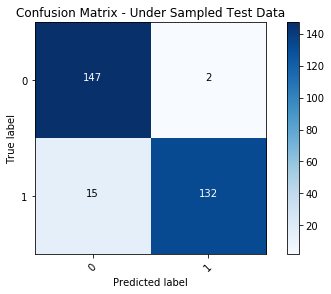

Precision =     0.985
Recall (TPR) =  0.898
Accuracy =  0.943


In [8]:
lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, ['0', '1'], title = 'Confusion Matrix - Under Sampled Test Data')
pr, tpr = show_data(cnf_matrix, print_res = 1);

Applying the model on fraud data only and ploting the congusion matrix. 

[[  0   0]
 [ 53 439]]


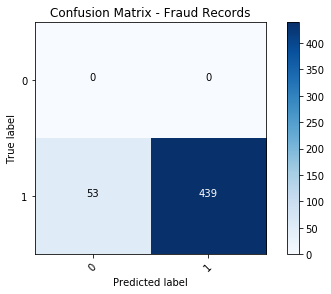

Precision =     1.000
Recall (TPR) =  0.892
Accuracy =  0.892


In [9]:
#lr = LogisticRegression(C = 0.01, penalty = 'l2')
#lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_fraud_record = lr.predict(X_fraud_record.values)

cnf_matrix = confusion_matrix(y_fraud_record, y_pred_fraud_record)
np.set_printoptions(precision=2)

print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, ['0', '1'], title = 'Confusion Matrix - Fraud Records')
pr, tpr = show_data(cnf_matrix, print_res = 1);

Applying the model on entire dataset and plotting the confusion matrix. 

[[276763   7552]
 [    53    439]]


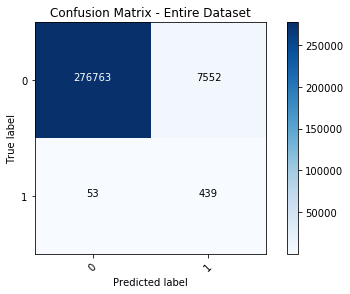

Precision =     0.055
Recall (TPR) =  0.892
Accuracy =  0.973


In [10]:
#lr = LogisticRegression(C = 0.01, penalty = 'l2')
#lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_all = lr.predict(X.values)

cnf_matrix = confusion_matrix(y, y_pred_all)
np.set_printoptions(precision=2)

print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, ['0', '1'], title = 'Confusion Matrix - Entire Dataset')
pr, tpr = show_data(cnf_matrix, print_res = 1);